# **Voice Gender Classification Using Neural Networks**

Dataset Used: https://www.kaggle.com/datasets/shabareesharyan/voice-dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
data = pd.read_csv('/content/drive/MyDrive/voice.csv')

In [4]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [10]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu',
kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu',
kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_1 (Dense)             (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5569 (21.75 KB)
Trainable params: 5569 (21.75 K

In [11]:
model.compile(
 optimizer='adam',
 loss='binary_crossentropy',
 metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)
history = model.fit(
 X_train,
 y_train,
 validation_split=0.2,
 batch_size=32,
 epochs=100,
 callbacks=[
 tf.keras.callbacks.EarlyStopping(
 monitor='val_loss',
 patience=3,
 restore_best_weights=True
 )
 ]
)
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)

Epoch 1/100
56/56 [==============================] - 2s 9ms/step - loss: 1.3985 - accuracy: 0.7208 - auc: 0.7954 - val_loss: 1.0972 - val_accuracy: 0.8964 - val_auc: 0.9703
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 1.0227 - accuracy: 0.8748 - auc: 0.9336 - val_loss: 0.7879 - val_accuracy: 0.9482 - val_auc: 0.9951
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.7703 - accuracy: 0.9165 - auc: 0.9731 - val_loss: 0.5986 - val_accuracy: 0.9775 - val_auc: 0.9956
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.6059 - accuracy: 0.9487 - auc: 0.9851 - val_loss: 0.4792 - val_accuracy: 0.9775 - val_auc: 0.9958
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4984 - accuracy: 0.9526 - auc: 0.9875 - val_loss: 0.3960 - val_accuracy: 0.9797 - val_auc: 0.9960
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.9616 - auc: 0.9888 - val_loss: 0.3342 - v

In [12]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

Test Loss: 0.1218612790107727
Test Accuracy: 0.9747633934020996
Test AUC: 0.9964995980262756


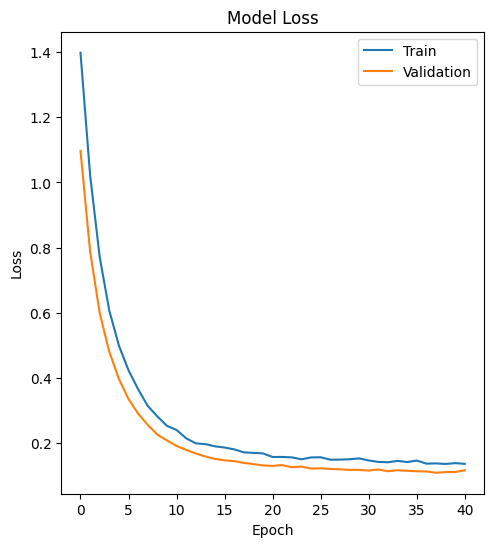

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

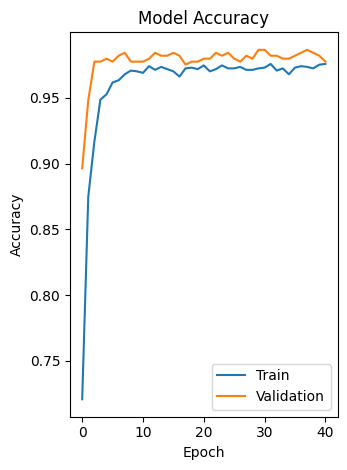

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()

In [15]:
random_index = np.random.randint(0, X_test.shape[0])
random_sample = X_test[random_index].reshape(1, -1)
predicted_label = model.predict(random_sample)
predicted_label = (predicted_label > 0.5).astype(int)[0][0]

1/1 [==============================] - 0s 147ms/step


In [16]:
predicted_label_decoded = label_encoder.inverse_transform([predicted_label])[0]

In [17]:
actual_label = y_test.iloc[random_index]
actual_label_decoded = label_encoder.inverse_transform([actual_label])[0]
print(f"Random Sample Index: {random_index}")
print(f"Predicted Label: {predicted_label_decoded}")
print(f"Actual Label: {actual_label_decoded}")

Random Sample Index: 586
Predicted Label: male
Actual Label: male
